In [1]:
try:
    passes += 1
except NameError:
    %cd ..
    passes = 1

c:\Users\susanne\git\binarybeech


In [2]:
import pandas as pd

In [3]:

df = pd.read_csv("data/titanic_kaggle.csv")
df_titanic = df.sample(frac=0.75)
df_test = df.loc[df.index.difference(df_titanic),:]
    

In [4]:

from binarybeech.binarybeech import *
import binarybeech.utils as utils


In [5]:

import logging
logging.basicConfig(level=logging.INFO)


In [6]:

rf_titanic = RandomForest(df=df_titanic.copy(),y_name="Survived", cart_settings={"max_depth":4,"min_leaf_samples":2, "min_split_samples":2},sample_frac=0.3,n_attributes=5,metrics_type="classification"
                                 )

In [7]:

rf_titanic.train(20)


A tree with 11 leafs was created
A tree with 13 leafs was created
A tree with 12 leafs was created
A tree with 10 leafs was created
A tree with 14 leafs was created
A tree with 11 leafs was created
A tree with 14 leafs was created
A tree with 16 leafs was created
A tree with 13 leafs was created
A tree with 12 leafs was created
A tree with 11 leafs was created
A tree with 14 leafs was created
A tree with 13 leafs was created
A tree with 12 leafs was created
A tree with 14 leafs was created
A tree with 14 leafs was created
A tree with 12 leafs was created
A tree with 16 leafs was created
A tree with 16 leafs was created
A tree with 14 leafs was created


In [8]:

rf_titanic.validate_oob()


{'precision': array([0.94019139, 0.524     ]),
 'recall': array([0.76757812, 0.83974359]),
 'F-score': 0.7452407436834578,
 'accuracy': 0.7844311377245509}

In [9]:

rf_titanic.validate()


{'precision': array([0.97129187, 0.528     ]),
 'recall': array([0.77480916, 0.91666667]),
 'F-score': 0.7660232575684094,
 'accuracy': 0.8053892215568862}

In [10]:

rf_titanic.variable_importance()


{'Sex': 1.0,
 'Pclass': 0.37162162162162166,
 'PassengerId': 0.26351351351351365,
 'Age': 0.17567567567567555,
 'Fare': 0.16891891891891903,
 'Embarked': 0.09459459459459453,
 'SibSp': 0.0878378378378378,
 'Parch': 0.08108108108108109,
 'Name': 0.0,
 'Ticket': 0.0,
 'Cabin': 0.0}

In [11]:

import binarybeech.utils as bu
bu.print_bars(rf_titanic.variable_importance(),max_width=50)



Sex       |############################### 1.0
Pclass    |############                   0.37
PassengerId|########                       0.26
Age       |#####                          0.18
Fare      |#####                          0.17
Embarked  |###                            0.095
SibSp     |###                            0.088
Parch     |###                            0.081
Name      |                                0.0
Ticket    |                                0.0
Cabin     |                                0.0


In [12]:

rf_titanic.validate(df_test)


{'precision': array([0.96903461, 0.52631579]),
 'recall': array([0.76657061, 0.91370558]),
 'F-score': 0.761948544502274,
 'accuracy': 0.7991021324354658}

In [13]:

gbt_titanic = GradientBoostedTree(df=df_titanic.copy(),y_name="Survived", cart_settings={"max_depth":2,"min_leaf_samples":10, "min_split_samples":10},sample_frac=0.75,n_attributes=9
                                 )

In [14]:
gbt_titanic.X_names

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [15]:
it=gbt_titanic._initial_tree()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


A tree with 1 leafs was created


In [16]:

utils.print_tree(it.tree)

0.625748502994012



In [17]:
it.tree.root

In [18]:

gbt_titanic.learning_rate=0.01
#gbt_titanic.create_trees(200)


In [19]:

gbt_titanic.predict(df_titanic.iloc[[0]])

array([0.6257485])

In [20]:

gbt_titanic.validate(df_test)


c:\Users\susanne\git\binarybeech\binarybeech\metrics.py:34: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)


{'precision': array([0., 1.]),
 'recall': array([       nan, 0.38383838]),
 'F-score': nan,
 'accuracy': 0.3838383838383838}

#k-fold cross-validation

In [21]:

c = CART(df=df_titanic,y_name="Survived",metrics_type="classification")


A tree with 107 leafs was created
A tree with 99 leafs was created
A tree with 94 leafs was created
A tree with 94 leafs was created
A tree with 86 leafs was created
A tree with 94 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.0017285936203282211


A tree with 107 leafs was created


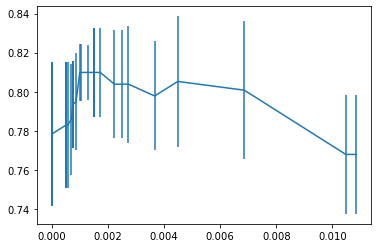

In [22]:
c.train(slack=1e-3)

In [23]:
c.tree.leaf_count()

21

In [24]:
utils.print_tree(c.tree)

Sex in ('female',)
├── False:Age<9.95
│   ├── False:Pclass<1.47
│   │   ├── False:0
│   │   └── True: PassengerId<564.34
│   │       ├── False:PassengerId<739.21
│   │       │   ├── False:Embarked in ('C',)
│   │       │   │   ├── False:0
│   │       │   │   └── True: 1
│   │       │   └── True: 1
│   │       └── True: Age<38.51
│   │           ├── False:0
│   │           └── True: PassengerId<379.12
│   │               ├── False:Fare<150.66
│   │               │   ├── False:0
│   │               │   └── True: 1
│   │               └── True: 0
│   └── True: SibSp<2.16
│       ├── False:0
│       └── True: 1
└── True: Pclass<2.24
    ├── False:Fare<24.71
    │   ├── False:0
    │   └── True: Embarked in ('S',)
    │       ├── False:Age<29.40
    │       │   ├── False:0
    │       │   └── True: 1
    │       └── True: SibSp<1.15
    │           ├── False:0
    │           └── True: Fare<11.24
    │               ├── False:Fare<17.45
    │               │   ├── False:0
    │             

In [25]:
c.validate(df_test)

{'precision': array([0.93078324, 0.69883041]),
 'recall': array([0.83224756, 0.86281588]),
 'F-score': 0.8254875350223713,
 'accuracy': 0.8417508417508418}